In [19]:
#Linear Regression
#### Your code here
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
from collections import Counter
from sklearn.model_selection import cross_val_predict

In [20]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [7]:
#Multiple Linear Regression on the housing Data
train = pd.read_csv('clean_train.csv')

In [8]:
train = train.drop('Unnamed: 0', axis=1)

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,TotalFinSF,AbvGrndRoomSize,YrSold_Garage_Difference,hasDeck,hasOpenPorch,hasEnlosedPorch,hasX3SsnPorch,hasScreenPorch,hasPool,hasFence
0,1,2 story newer,low density,65.0,9.041922,Reg,Lvl,Inside,Gtl,CollgCr,...,7.789869,213.750000,1.791759,No,Yes,No,No,No,0,0
1,2,1 story (new styles),low density,80.0,9.169518,Reg,Lvl,FR2,Gtl,Veenker,...,7.714231,210.333333,3.465736,Yes,No,No,No,No,0,0
2,3,2 story newer,low density,68.0,9.328123,IR1,Lvl,Inside,Gtl,CollgCr,...,7.728416,297.666667,2.079442,No,Yes,No,No,No,0,0
3,4,2 story older,low density,60.0,9.164296,IR1,Lvl,Corner,Gtl,Crawfor,...,7.566828,245.285714,2.197225,No,Yes,Yes,No,No,0,0
4,5,2 story newer,low density,84.0,9.565214,IR1,Lvl,FR2,Gtl,NoRidge,...,7.956126,244.222222,2.197225,Yes,Yes,No,No,No,0,0


In [10]:
train_features = train.loc[:, 'MSSubClass':'hasFence']

In [11]:
train_target = train_features.loc[:,'SalePrice']
train_target = np.log(train_target.astype(float))

In [12]:
np.where(np.isinf(train_target))

(array([], dtype=int64),)

In [13]:
train_features.drop('SalePrice', axis=1,inplace=True)

In [15]:
#MLRSPECIFIC 
train_features_mlr = pd.get_dummies(train_features,drop_first=True)

In [111]:
train_features = pd.get_dummies(train_features)#,drop_first=False)

In [16]:
train_features_mlr.columns
#train_features.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'hasDeck_Yes',
       'hasOpenPorch_Yes', 'hasEnlosedPorch_Yes', 'hasX3SsnPorch_Yes',
       'hasScreenPorch_Yes'],
      dtype='object', length=167)

In [113]:
import statsmodels.api as sm

In [114]:
#try:  # train_test_split was moved in 0.18.0
#    from sklearn.model_selection import train_test_split
#except:  # Following import works through 0.19 but outputs a warning in 0.18
#    from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

In [115]:
model = LinearRegression()

In [96]:
#text_x = train_features.loc[:,('LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
#       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual','hasDeck_No', 'hasDeck_Yes', 'hasOpenPorch_No', 'hasOpenPorch_Yes',
#       'hasEnlosedPorch_No', 'hasEnlosedPorch_Yes', 'hasX3SsnPorch_No',
#       'hasX3SsnPorch_Yes', 'hasScreenPorch_No', 'hasScreenPorch_Yes')]

In [116]:
train_features.columns
#test_x = train_features.loc[:,('OverallQual','YearBuilt','ExterQual')]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'hasDeck_No', 'hasDeck_Yes', 'hasOpenPorch_No', 'hasOpenPorch_Yes',
       'hasEnlosedPorch_No', 'hasEnlosedPorch_Yes', 'hasX3SsnPorch_No',
       'hasX3SsnPorch_Yes', 'hasScreenPorch_No', 'hasScreenPorch_Yes'],
      dtype='object', length=194)

In [117]:
train_features.select_dtypes(["int64"]).head()

,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,GarageFinish,GarageCars,GarageQual,GarageCond,MoSold,YrSold,TotalHalfBath,TotalFullBath,hasPool,hasFence
0,7,5,1,3,2,4,3,1,6,1,...,5,2,3,3,2,2008,1,3,0,0
1,6,8,1,2,2,4,3,4,5,1,...,5,2,3,3,5,2007,1,2,0,0
2,7,5,0,3,2,4,3,2,6,1,...,5,2,3,3,9,2008,1,3,0,0
3,7,5,0,2,2,3,4,1,5,1,...,5,3,3,3,2,2006,0,2,0,0
4,8,5,1,3,2,4,3,3,6,1,...,5,3,3,3,12,2008,1,3,0,0


In [118]:
#np.where(np.isnan(train_features))
#train_features[~train_features.isin([-np.inf]).any(1)].replace()
#np.isinf(train_features.values.any())
#np.isnan(train_target.values.any())
#train_features.select_dtypes(["float64"])
train_features.replace([np.inf,-np.inf],0, inplace=True)
#train_features[train_features.columns]

In [119]:
#### Your code here
results = model.fit(train_features, train_target)
#results.score(train_features, train_target)

In [120]:
results.score(train_features, train_target)

0.92518799771564941

In [194]:
y_pred = results.predict(train_features)
mean_squared_error(train_target, y_pred)

0.011928961254833751

In [121]:
results.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [122]:
        predicted = cross_val_predict(model, train_features, train_target, cv=10)

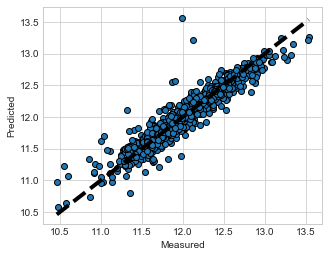

In [123]:
fig, ax = plt.subplots()
ax.scatter(train_target, predicted, edgecolors=(0, 0, 0))
ax.plot([train_target.min(), train_target.max()], [train_target.min(), train_target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [130]:
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge

In [127]:
# Fit the Bayesian Ridge Regression
clf = BayesianRidge(compute_score=True)
clf.fit(train_features, train_target)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [135]:
clf.score(train_features, train_target) 

0.92075039214980403

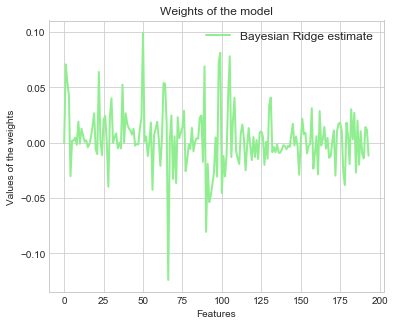

In [142]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
#plt.plot(clf., color='gold', linewidth=lw, label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# plt.figure(figsize=(6, 5))
# plt.title("Histogram of the weights")
# plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
#          edgecolor='black')
# plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
#             color='navy', label="Relevant features")
# plt.ylabel("Features")
# plt.xlabel("Values of the weights")
# plt.legend(loc="upper left")

# plt.figure(figsize=(6, 5))
# plt.title("Marginal log-likelihood")
# plt.plot(clf.scores_, color='navy', linewidth=lw)
# plt.ylabel("Score")
# plt.xlabel("Iterations")


In [132]:
ridge = Ridge(alpha=1.0)
ridge.fit(train_features, train_target) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
ridge.score(train_features, train_target) 

0.92492571735327511

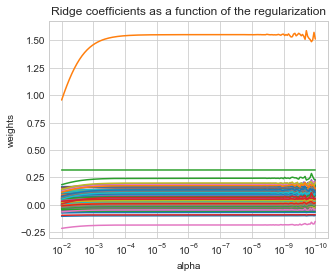

In [149]:
# n_alphas = 200
# alphas = np.logspace(-10, -2, n_alphas)
# coefs = []
# for a in alphas:
#     ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
#     ridge.fit(train_features, train_target) 
#     coefs.append(ridge.coef_)

# # #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [188]:
y_pred = ridge.predict(train_features)
rss = sum((y_pred-train_target)**2)
ret = [rss]
ret.extend([ridge.intercept_])
ret.extend(ridge.coef_)
#ret

In [189]:
mean_squared_error(train_target, y_pred)

0.011934021745467132

In [191]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_features.columns, ridge.coef_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Coef-importance'})
importances.sort_values(by='Coef-importance')

,Coef-importance
MSZoning_misc,-0.215016
Neighborhood_Edwards,-0.105089
Neighborhood_MeadowV,-0.096157
Neighborhood_OldTown,-0.074629
Electrical_Mix,-0.064740
Neighborhood_IDOTRR,-0.064665
KitchenAbvGr,-0.064124
Neighborhood_Mitchel,-0.053061
Neighborhood_Sawyer,-0.045474
X1stFlrSF,-0.040656


In [161]:
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(train_features, train_target) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [167]:
train_features.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'hasDeck_No', 'hasDeck_Yes', 'hasOpenPorch_No', 'hasOpenPorch_Yes',
       'hasEnlosedPorch_No', 'hasEnlosedPorch_Yes', 'hasX3SsnPorch_No',
       'hasX3SsnPorch_Yes', 'hasScreenPorch_No', 'hasScreenPorch_Yes'],
      dtype='object', length=194)

In [179]:
print(lasso.coef_)

[ 0.00251291  0.          0.08172085  0.         -0.0183379   0.
  0.00250625  0.          0.          0.          0.          0.
  0.00507232  0.0039047   0.         -0.          0.          0.          0.
  0.         -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.03161064  0.          0.
  0.0019896  -0.          0.00013555 -0.          0.          0.          0.
  0.          0.00560093  0.00107878 -0.          0.         -0.          0.
 -0.          0.          0.          0.          0.00267408 -0.         -0.
 -0.          0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.          0.
  0.         -0.       

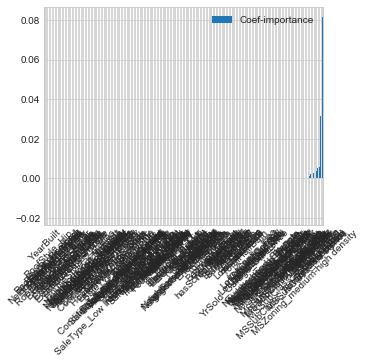

In [204]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_features.columns, lasso.coef_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Coef-importance'})
importances.sort_values(by='Coef-importance').plot(kind='bar', rot=45)

In [210]:
importances.sort_values(by='Coef-importance').tail(20)

,Coef-importance
MSZoning_low density,0.000000
MSZoning_floating,0.000000
MSZoning_misc,-0.000000
LotShape_IR1,0.000000
LotShape_IR2,0.000000
LotShape_IR3,-0.000000
LotShape_Reg,-0.000000
MSZoning_medium-high density,-0.000000
MSSubClass_1.5 stories,-0.000000
GarageYrBlt,0.000136


In [209]:
importances.sort_values(by='Coef-importance').head(5)

,Coef-importance
YearBuilt,-0.018338
Neighborhood_NPkVill,-0.000000
RoofStyle_Gambrel,-0.000000
RoofStyle_Hip,0.000000
RoofStyle_Mansard,-0.000000


In [206]:
from sklearn.metrics import mean_squared_error
y_pred = lasso.predict(train_features)
mean_squared_error(train_target, y_pred)
#y_pred = ridge.predict(train_features)
#rss = sum((y_pred-train_target)**2)
#ret = [rss]

0.039649070318867649

In [193]:
lasso.score(train_features, train_target)

0.75134244500412362

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [197]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_features, train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [198]:
print(regr.feature_importances_)

[ 0.          0.          0.69866027  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.01298278  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.28835695  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [202]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_features.columns, regr.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Coef-importance'})
importances.sort_values(by='Coef-importance').tail()

,Coef-importance
YrSold_Garage_Difference,0.000000
AbvGrndRoomSize,0.000000
GarageCars,0.012983
TotalFinSF,0.288357
OverallQual,0.698660
